# Minicourse of Bayesian Machine Learning for Scientific Research
## Lecture 1

This notebook if intended solely for the Minicourse of Bayesian Machine Learning for Scientific Research.  

We want you to pay attention and participate in the lectures, this is why the notebook is not self-contained.  It has many comments that should be uncommented and tested, etc.

In [72]:
import stan
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize']=5,5
matplotlib.rcParams['figure.dpi']=100
#plt.style.use('ggplot')

In [2]:
# this is a work around found at 
# https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop-in-spyd
import nest_asyncio
nest_asyncio.apply()

### Generate data

In [9]:
# Create data sampled from a mixture of gaussians
# define the parameters
np.random.seed(1)
mu0 = 2
sigma0 = 1.5
mu1 = 5
sigma1 = 1.3
p = 0.8 # mixture parameter
#sampling
out = []
bernoulli = np.random.binomial(1, p, size=10000)
for i in range(len(bernoulli)):
    if bernoulli[i] == 1:
        out.append(np.random.normal(mu0,sigma0))
    else:
        out.append(np.random.normal(mu1,sigma1))

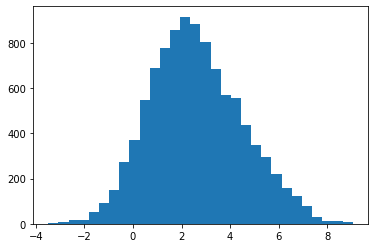

In [10]:
# We plot the data without labels (as we would actually see it!)
plt.hist(out, bins=30)
plt.show()

### Implementing the Gaussian Mixture model

In [11]:
my_mixture="""
data {
 int <lower=0> N;
 vector[N] y;
}

parameters {
  ordered[2] mu;  // This tells the sampler that always mu[1] < mu[2]
  //real mu[2];   // Study what happens if we use this line instead of the above  (it is called 'label switching')
  real<lower=0> sigma[2];
  real<lower=0, upper=1> theta;
}

model {   
 sigma ~ normal(0, 2);  
 mu[1] ~ normal(3, 2);
 mu[2] ~ normal(3, 2);
 theta ~ beta(1, 1);  //this is a uniform flat distribution for p in (0,1)
 for (n in 1:N)
   target += log_mix(theta,
                     normal_lpdf(y[n] | mu[1], sigma[1]),
                     normal_lpdf(y[n] | mu[2], sigma[2]));
}
"""

In [12]:
my_data={'N':len(out),'y':out}

In [13]:
model = stan.build(my_mixture, data=my_data, random_seed=1);

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_6rajflcu/model_x7vzjora.stan', line 10, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_6rajflcu/model_x7vzjora.stan', line 18, column 1: The
    parameter theta is on the left-hand side of more than one tilde
    statement.


In [8]:
fit = model.sample(num_chains=5, num_samples=1000)

Sampling:   0%
Sampling:   0% (1/10000)
Sampling:   0% (2/10000)
Sampling:   1% (102/10000)
Sampling:   2% (202/10000)
Sampling:   3% (302/10000)
Sampling:   6% (601/10000)
Sampling:   8% (800/10000)
Sampling:  11% (1100/10000)
Sampling:  14% (1400/10000)
Sampling:  16% (1600/10000)
Sampling:  20% (2000/10000)
Sampling:  21% (2100/10000)
Sampling:  24% (2400/10000)
Sampling:  28% (2800/10000)
Sampling:  31% (3100/10000)
Sampling:  33% (3300/10000)
Sampling:  44% (4400/10000)
Sampling:  55% (5500/10000)
Sampling:  67% (6700/10000)
Sampling:  81% (8100/10000)
Sampling:  92% (9200/10000)
Sampling:  98% (9800/10000)
Sampling: 100% (10000/10000)
Sampling: 100% (10000/10000), done.
Messages received during sampling:
  Gradient evaluation took 0.000283 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.83 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:


In [9]:
df = fit.to_frame() 

In [10]:
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu.1,mu.2,sigma.1,sigma.2,theta
draws,,,,,,,,,,,,
0,-2081.286964,0.828670,0.120567,2.0,7.0,0.0,2083.097357,2.466486,6.040714,1.805488,0.691627,0.911918
1,-2077.875577,0.994540,0.060051,3.0,7.0,0.0,2079.183856,2.210275,5.523963,1.753013,1.055584,0.881072
2,-2078.692142,0.681846,0.146824,3.0,7.0,0.0,2083.732047,1.781341,4.743379,1.408682,1.278407,0.685911
3,-2082.049462,0.967822,0.157554,4.0,23.0,0.0,2083.026385,2.057336,4.578836,1.757898,1.525309,0.783214
4,-2076.124927,0.982889,0.098455,4.0,31.0,0.0,2078.510018,2.208948,5.512449,1.616734,1.010748,0.852655
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-2079.793190,0.685864,0.120567,2.0,3.0,0.0,2080.367844,2.129844,5.119786,1.552145,1.025597,0.822579
4996,-2076.382096,0.943863,0.060051,4.0,31.0,0.0,2079.356726,2.076436,5.482081,1.609151,1.026468,0.839874
4997,-2079.043675,0.994879,0.146824,4.0,23.0,0.0,2082.142639,2.091118,5.395731,1.581178,0.960701,0.801554


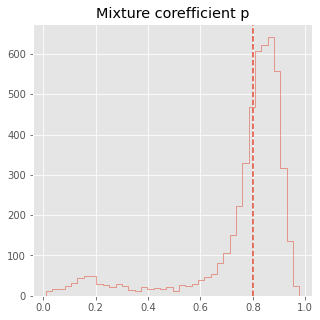

In [11]:
plt.hist(df['theta'], histtype='step', bins=40)
plt.axvline(x=p, linestyle='dashed')
#plt.axvline(x=1-p, linestyle='dashed')
plt.title('Mixture corefficient p')
plt.show()

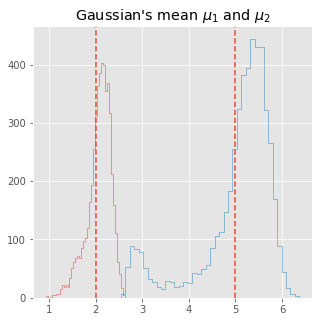

In [12]:
plt.hist(df['mu.1'],histtype='step', bins=40, label='mu1')
plt.hist(df['mu.2'],histtype='step', bins=40, label='mu2')
plt.axvline(x=mu0, linestyle='dashed')
plt.axvline(x=mu1, linestyle='dashed')
plt.title("Gaussian's mean $\mu_1$ and $\mu_2$")
plt.show()

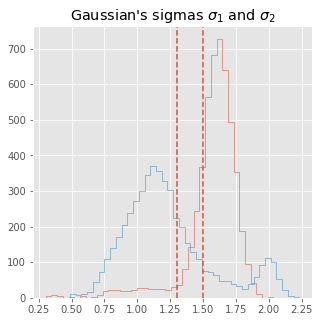

In [13]:
plt.hist(df['sigma.1'],histtype='step', bins=40, label='sigma1')
plt.hist(df['sigma.2'],histtype='step', bins=40, label='sigma2')
plt.axvline(x=sigma0, linestyle='dashed')
plt.axvline(x=sigma1, linestyle='dashed')
plt.title("Gaussian's sigmas $\sigma_1$ and $\sigma_2$")
plt.show()

## Draft

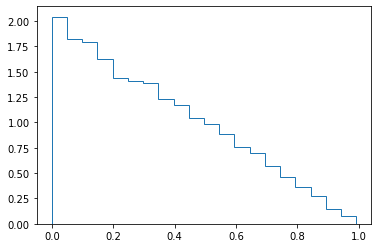

In [24]:
plt.hist(np.random.beta(1,2,10000), histtype='step', bins=20, density=1)
plt.show()

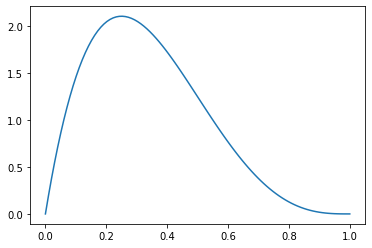

In [29]:
x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x,2,4))
plt.show()